In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('./dataset/online_retail_1.csv', encoding='unicode_escape')
df2 = pd.read_csv('./dataset/online_retail_2.csv', encoding='unicode_escape')

In [3]:
print(df1.shape)
print(df2.shape)

(525461, 8)
(541910, 8)


In [4]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.0,United Kingdom


In [5]:
df1['Description'].nunique()

4681

In [6]:
for c in df1.columns:
    print(f'Unique "{c}": \t{df1[c].nunique()}')

Unique "Invoice": 	28816
Unique "StockCode": 	4632
Unique "Description": 	4681
Unique "Quantity": 	825
Unique "InvoiceDate": 	25296
Unique "Price": 	1606
Unique "Customer ID": 	4383
Unique "Country": 	40


In [7]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'], format="%d/%m/%y %H:%M")
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'], format="%d/%m/%y %H:%M")

In [8]:
print(f"From {min(df1['InvoiceDate'])} to {max(df1['InvoiceDate'])}")

From 2009-12-01 07:45:00 to 2010-12-09 20:01:00


In [9]:
print(f"From {min(df2['InvoiceDate'])} to {max(df2['InvoiceDate'])}")

From 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [10]:
# initially assumed that StockCode is ProductId

In [11]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [12]:
# df1 = df.copy()
# df1['Description'] = df1['Description'].fillna('Unknown(asd)')

# stockcode_description_counts = df1.groupby('StockCode')['Description'].nunique()

# # Filter stock codes with multiple descriptions
# stockcodes_with_multiple_descriptions = stockcode_description_counts[stockcode_description_counts > 1]

# # Print stock codes with multiple descriptions and their corresponding descriptions
# for stockcode in stockcodes_with_multiple_descriptions.index:
#     descriptions = df1[df1['StockCode'] == stockcode]['Description'].unique()
#     print(f"StockCode: {str(stockcode)}, Descriptions: {', '.join(descriptions)}")

In [13]:
df1 = df.copy()

stockcode_description_counts = df1.groupby('StockCode')['Description'].nunique()

# Filter stock codes with multiple descriptions
stockcodes_with_no_descriptions = stockcode_description_counts[stockcode_description_counts == 0]

# Print stock codes with no descriptions and their corresponding descriptions
for stockcode in stockcodes_with_no_descriptions.index:
    print(f"StockCode: {str(stockcode)}")

StockCode: 10124C
StockCode: 15060A
StockCode: 16065A
StockCode: 16131
StockCode: 16132
StockCode: 16155H
StockCode: 16156A
StockCode: 16161N
StockCode: 16169H
StockCode: 16195
StockCode: 16200A
StockCode: 16201C
StockCode: 16210
StockCode: 16222B
StockCode: 16240
StockCode: 16243A
StockCode: 16245B
StockCode: 16248A
StockCode: 16249B
StockCode: 16255
StockCode: 17010S
StockCode: 17013A
StockCode: 17013E
StockCode: 17014B
StockCode: 17017
StockCode: 17084F
StockCode: 17120
StockCode: 17160
StockCode: 18033
StockCode: 18094A
StockCode: 18096B
StockCode: 20690
StockCode: 20691
StockCode: 20710
StockCode: 20720
StockCode: 20743
StockCode: 20824
StockCode: 20844
StockCode: 20859
StockCode: 20880
StockCode: 20883
StockCode: 20900
StockCode: 20904
StockCode: 20911
StockCode: 20937
StockCode: 20938
StockCode: 20944
StockCode: 20946
StockCode: 20951
StockCode: 20955
StockCode: 20959
StockCode: 20965
StockCode: 20995
StockCode: 21005
StockCode: 21019
StockCode: 21020
StockCode: 21021
StockCode:

In [14]:
df[df['StockCode'] == '62095B']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
76825,496354,62095B,TURQOISE ICE CREAM SUNHAT,12,2010-02-01 09:52:00,1.69,12810.0,Japan
82547,496974,62095B,TURQOISE ICE CREAM SUNHAT,12,2010-02-05 08:53:00,1.45,14298.0,United Kingdom
114814,500336,62095B,TURQOISE ICE CREAM SUNHAT,3,2010-03-07 13:48:00,1.69,17589.0,United Kingdom
171472,505684,62095B,TURQOISE ICE CREAM SUNHAT,1,2010-04-23 16:16:00,3.36,NaN,United Kingdom
172055,505709,62095B,TURQOISE ICE CREAM SUNHAT,2,2010-04-25 12:34:00,1.69,13050.0,United Kingdom
175449,506047,62095B,TURQOISE ICE CREAM SUNHAT,7,2010-04-27 11:48:00,1.69,16782.0,United Kingdom
179741,506438,62095B,TURQOISE ICE CREAM SUNHAT,2,2010-04-29 15:42:00,1.69,NaN,United Kingdom
195782,508097,62095B,TURQOISE ICE CREAM SUNHAT,12,2010-05-13 09:33:00,1.69,12683.0,France
197411,508333,62095B,TURQOISE ICE CREAM SUNHAT,120,2010-05-14 12:00:00,0.85,13694.0,United Kingdom
198126,508464,62095B,TURQOISE ICE CREAM SUNHAT,24,2010-05-16 10:37:00,0.85,17581.0,United Kingdom


In [15]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [16]:
type(df['InvoiceDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
df['InvoiceDate'].dt.year.value_counts()

InvoiceDate
2010    522714
2011    499429
2009     45228
Name: count, dtype: int64

In [18]:
df[df['InvoiceDate'].dt.year == 2010]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,United Kingdom
45229,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0,United Kingdom
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,United Kingdom
45231,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN,United Kingdom
45232,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
567937,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,2010-12-23 16:49:00,1.25,NaN,United Kingdom
567938,539991,72741,GRAND CHOCOLATECANDLE,4,2010-12-23 16:49:00,1.45,NaN,United Kingdom
567939,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,2010-12-23 17:41:00,3.75,NaN,United Kingdom
567940,539992,22258,FELT FARM ANIMAL RABBIT,1,2010-12-23 17:41:00,1.25,NaN,United Kingdom


# Cleaning 

In [19]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [20]:
df = df[df['Quantity'] > 0]
df = df.dropna(subset=['Customer ID', 'Invoice', 'StockCode'])

In [21]:
df['Customer ID'] = df['Customer ID'].astype(int)

In [22]:
df.shape

(805620, 8)

In [23]:
# df.to_csv('./dataset/online_retail_cleaned.csv', index=False)

In [24]:
df = pd.read_csv('./dataset/online_retail_cleaned.csv', index_col=None)

In [25]:
df['Revenue'] = df['Quantity'] * df['Price']

In [26]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [27]:
revenue_per_customer = df.groupby('Customer ID')['Revenue'].sum().reset_index()
revenue_per_customer

,Customer ID,Revenue
0,12346,77556.46
1,12347,5633.32
2,12348,2019.40
3,12349,4428.69
4,12350,334.40
...,...,...
5876,18283,2736.65
5877,18284,461.68
5878,18285,427.00
5879,18286,1296.43


In [28]:
max(revenue_per_customer['Revenue'])

608821.65

In [29]:
min(revenue_per_customer['Revenue'])

0.0

Text(0, 0.5, 'Customer counts')

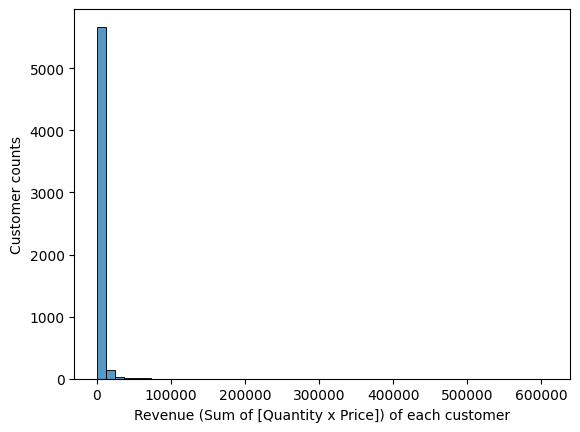

In [30]:
sns.histplot(revenue_per_customer, x='Revenue', bins=50)
plt.xlabel('Revenue (Sum of [Quantity x Price]) of each customer')
plt.ylabel('Customer counts')


In [31]:
for i in range(5):
    print(revenue_per_customer.quantile())
revenue_per_customer

Customer ID    15313.00
Revenue          897.62
Name: 0.5, dtype: float64
Customer ID    15313.00
Revenue          897.62
Name: 0.5, dtype: float64
Customer ID    15313.00
Revenue          897.62
Name: 0.5, dtype: float64
Customer ID    15313.00
Revenue          897.62
Name: 0.5, dtype: float64
Customer ID    15313.00
Revenue          897.62
Name: 0.5, dtype: float64


,Customer ID,Revenue
0,12346,77556.46
1,12347,5633.32
2,12348,2019.40
3,12349,4428.69
4,12350,334.40
...,...,...
5876,18283,2736.65
5877,18284,461.68
5878,18285,427.00
5879,18286,1296.43


In [32]:
revenue_per_customer.shape[0]//5

1176

In [33]:
revenue_per_customer.quantile(0.8)

Customer ID    17097.00
Revenue         2957.47
Name: 0.8, dtype: float64

In [34]:
revenue_per_customer.quantile(0.6)

Customer ID    15906.00
Revenue         1247.69
Name: 0.6, dtype: float64

In [35]:
revenue_per_customer.quantile(0.5)

Customer ID    15313.00
Revenue          897.62
Name: 0.5, dtype: float64

In [36]:
max(revenue_per_customer['Revenue'])/897.62

678.2621265123327

In [37]:
revenue_per_customer.quantile(0.4)

Customer ID    14719.0
Revenue          617.6
Name: 0.4, dtype: float64

In [38]:
revenue_per_customer.quantile(0.2)

Customer ID    13536.00
Revenue          289.78
Name: 0.2, dtype: float64

In [39]:
revenue_per_customer.quantile(0)

Customer ID    12346.0
Revenue            0.0
Name: 0.0, dtype: float64

In [40]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
805615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
805616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
805617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
805618,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


In [41]:
order_per_customer =  df.groupby('Customer ID')['Invoice'].count().reset_index()

In [42]:
order_per_customer

,Customer ID,Invoice
0,12346,34
1,12347,253
2,12348,51
3,12349,175
4,12350,17
...,...,...
5876,18283,986
5877,18284,28
5878,18285,12
5879,18286,67


<Axes: xlabel='Invoice', ylabel='Count'>

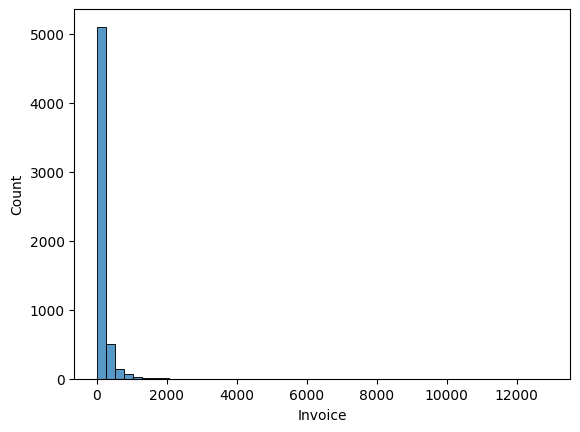

In [43]:
sns.histplot(order_per_customer, x='Invoice', bins=50)

In [44]:
last_seen = df.groupby('Customer ID')['InvoiceDate'].max().reset_index()
last_seen

,Customer ID,InvoiceDate
0,12346,2011-01-18 10:01:00
1,12347,2011-12-07 15:52:00
2,12348,2011-09-25 13:13:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00
...,...,...
5876,18283,2011-12-06 12:02:00
5877,18284,2010-10-04 11:33:00
5878,18285,2010-02-17 10:24:00
5879,18286,2010-08-20 11:57:00


In [45]:
reference_date = pd.to_datetime('2012-01-01')
last_seen['InvoiceDate'] = pd.to_datetime(last_seen['InvoiceDate'])
last_seen['Days'] = (last_seen['InvoiceDate'] - reference_date).dt.days

In [46]:
last_seen

,Customer ID,InvoiceDate,Days
0,12346,2011-01-18 10:01:00,-348
1,12347,2011-12-07 15:52:00,-25
2,12348,2011-09-25 13:13:00,-98
3,12349,2011-11-21 09:51:00,-41
4,12350,2011-02-02 16:01:00,-333
...,...,...,...
5876,18283,2011-12-06 12:02:00,-26
5877,18284,2010-10-04 11:33:00,-454
5878,18285,2010-02-17 10:24:00,-683
5879,18286,2010-08-20 11:57:00,-499


<Axes: xlabel='Days', ylabel='Count'>

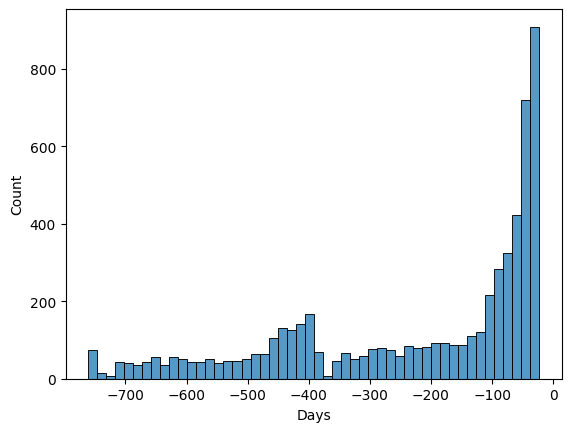

In [47]:
sns.histplot(last_seen, x='Days', bins=50)

In [48]:
customer_eval = pd.merge(revenue_per_customer, order_per_customer, on='Customer ID', how='inner')
customer_eval = pd.merge(customer_eval, last_seen, on='Customer ID', how='inner')
customer_eval

,Customer ID,Revenue,Invoice,InvoiceDate,Days
0,12346,77556.46,34,2011-01-18 10:01:00,-348
1,12347,5633.32,253,2011-12-07 15:52:00,-25
2,12348,2019.40,51,2011-09-25 13:13:00,-98
3,12349,4428.69,175,2011-11-21 09:51:00,-41
4,12350,334.40,17,2011-02-02 16:01:00,-333
...,...,...,...,...,...
5876,18283,2736.65,986,2011-12-06 12:02:00,-26
5877,18284,461.68,28,2010-10-04 11:33:00,-454
5878,18285,427.00,12,2010-02-17 10:24:00,-683
5879,18286,1296.43,67,2010-08-20 11:57:00,-499


In [49]:
customer_eval.drop(['InvoiceDate'], axis=1, inplace=True)

In [50]:
customer_eval

,Customer ID,Revenue,Invoice,Days
0,12346,77556.46,34,-348
1,12347,5633.32,253,-25
2,12348,2019.40,51,-98
3,12349,4428.69,175,-41
4,12350,334.40,17,-333
...,...,...,...,...
5876,18283,2736.65,986,-26
5877,18284,461.68,28,-454
5878,18285,427.00,12,-683
5879,18286,1296.43,67,-499


In [51]:
matrices = {}
for m in ['Revenue', 'Invoice', 'Days']:
    matrices[m] = []
    matrices[m].append(customer_eval[m].mean())
    matrices[m].append(customer_eval[m].std())

matrices

{'Revenue': [3017.076887944227, 14734.128618510984],
 'Invoice': [136.9869069886074, 353.7790184227478],
 'Days': [-223.9928583574222, 209.48965104407065]}

In [52]:
for m in ['Revenue', 'Invoice', 'Days']:
    customer_eval[f'{m} score'] = (customer_eval[m]-matrices[m][0])/matrices[m][1]

customer_eval

,Customer ID,Revenue,Invoice,Days,Revenue score,Invoice score,Days score
0,12346,77556.46,34,-348,5.058961,-0.291105,-0.591949
1,12347,5633.32,253,-25,0.177563,0.327925,0.949894
2,12348,2019.40,51,-98,-0.067712,-0.243053,0.601428
3,12349,4428.69,175,-41,0.095806,0.107449,0.873517
4,12350,334.40,17,-333,-0.182072,-0.339158,-0.520346
...,...,...,...,...,...,...,...
5876,18283,2736.65,986,-26,-0.019032,2.399840,0.945120
5877,18284,461.68,28,-454,-0.173434,-0.308065,-1.097940
5878,18285,427.00,12,-683,-0.175788,-0.353291,-2.191073
5879,18286,1296.43,67,-499,-0.116780,-0.197827,-1.312748


In [53]:
customer_eval['Sum score'] = customer_eval['Revenue score']+customer_eval['Invoice score']+customer_eval['Days score']
customer_eval

,Customer ID,Revenue,Invoice,Days,Revenue score,Invoice score,Days score,Sum score
0,12346,77556.46,34,-348,5.058961,-0.291105,-0.591949,4.175907
1,12347,5633.32,253,-25,0.177563,0.327925,0.949894,1.455382
2,12348,2019.40,51,-98,-0.067712,-0.243053,0.601428,0.290663
3,12349,4428.69,175,-41,0.095806,0.107449,0.873517,1.076772
4,12350,334.40,17,-333,-0.182072,-0.339158,-0.520346,-1.041576
...,...,...,...,...,...,...,...,...
5876,18283,2736.65,986,-26,-0.019032,2.399840,0.945120,3.325928
5877,18284,461.68,28,-454,-0.173434,-0.308065,-1.097940,-1.579439
5878,18285,427.00,12,-683,-0.175788,-0.353291,-2.191073,-2.720152
5879,18286,1296.43,67,-499,-0.116780,-0.197827,-1.312748,-1.627354


<Axes: xlabel='Sum score', ylabel='Count'>

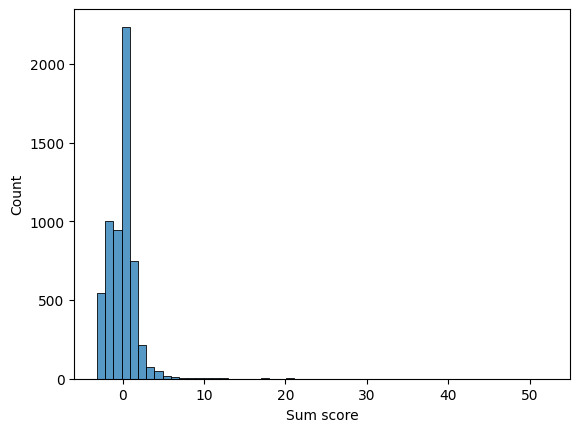

In [54]:
sns.histplot(customer_eval['Sum score'], bins=55)

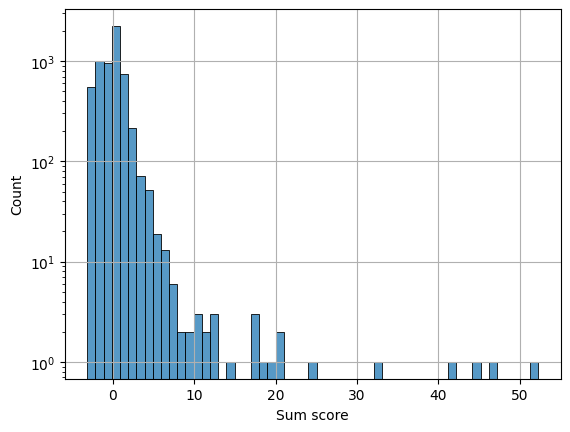

In [55]:
h = sns.histplot(customer_eval['Sum score'], bins=55)
h.set_yscale('log')
h.grid()

In [56]:
simplified_score = np.floor(customer_eval['Sum score'])
simplified_score.value_counts().sort_index()

Sum score
-4.0       75
-3.0      543
-2.0     1049
-1.0      972
 0.0     2239
 1.0      631
 2.0      192
 3.0       73
 4.0       47
 5.0       18
 6.0       11
 7.0        5
 8.0        2
 9.0        2
 10.0       4
 11.0       1
 12.0       3
 14.0       1
 17.0       3
 18.0       1
 19.0       1
 20.0       1
 21.0       1
 24.0       1
 33.0       1
 41.0       1
 44.0       1
 47.0       1
 52.0       1
Name: count, dtype: int64

In [57]:
customer_eval.to_csv('./dataset/customer_score.csv', index=False)

## 2.

In [58]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
805615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
805616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
805617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
805618,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


In [66]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [74]:
customer_list = sorted(df['Customer ID'].unique())

In [75]:
customer_list

[12346,
 12347,
 12348,
 12349,
 12350,
 12351,
 12352,
 12353,
 12354,
 12355,
 12356,
 12357,
 12358,
 12359,
 12360,
 12361,
 12362,
 12363,
 12364,
 12365,
 12366,
 12367,
 12368,
 12369,
 12370,
 12371,
 12372,
 12373,
 12374,
 12375,
 12376,
 12377,
 12378,
 12379,
 12380,
 12381,
 12383,
 12384,
 12385,
 12386,
 12387,
 12388,
 12389,
 12390,
 12391,
 12392,
 12393,
 12394,
 12395,
 12396,
 12397,
 12398,
 12399,
 12400,
 12401,
 12402,
 12403,
 12404,
 12405,
 12406,
 12407,
 12408,
 12409,
 12410,
 12411,
 12412,
 12413,
 12414,
 12415,
 12416,
 12417,
 12418,
 12419,
 12420,
 12421,
 12422,
 12423,
 12424,
 12425,
 12426,
 12427,
 12428,
 12429,
 12430,
 12431,
 12432,
 12433,
 12434,
 12435,
 12436,
 12437,
 12438,
 12439,
 12440,
 12441,
 12442,
 12443,
 12444,
 12445,
 12446,
 12447,
 12448,
 12449,
 12450,
 12451,
 12452,
 12453,
 12454,
 12455,
 12456,
 12457,
 12458,
 12459,
 12460,
 12461,
 12462,
 12463,
 12464,
 12465,
 12466,
 12467,
 12468,
 12469,
 12470,
 12471,


In [78]:
sns.barplot(df['InvoiceDate'])

KeyboardInterrupt: 

In [ ]:
df1 = 

In [ ]:
df['date'] = pd.to_datetime(df[''])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Resample the DataFrame to daily frequency and fill missing values
df_resampled = df.resample('D').asfreq()

# Identify missing dates
missing_dates = df_resampled[df_resampled.isnull().any(axis=1)].index

# Print missing dates
if len(missing_dates) > 0:
    print("Missing dates:")
    print(missing_dates)
else:
    print("No missing dates found.")